In [1]:
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
#from getCitiBikeCSV import getCitiBikeCSV
import numpy as np
import os
import sys

#check if the env variable PUIDATA exists
if os.getenv("PUIDATA") is None:
    print ("must set PUIDATA env variable")
    sys.exit()

def getCitiBikeCSV(datestring):
    '''Downloads citibike data and unzips it. If the data is downloaded by not unzippeds it zips it. Moves the data to $PUIDATA
    Arguments:
        date string as yyyymm
    '''
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
#import json
#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


In [2]:
datestring = '201606'
getCitiBikeCSV(datestring)

('Downloading', '201606')
file in place, you can continue


In [3]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


In [4]:
df['date']=pd.to_datetime(df['starttime'])

In [5]:
#df.head()
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

# Split by gender

In [6]:
df['ageM'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [7]:
df.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
count,1.460318e+06,1.460318e+06,1.460318e+06,1.460318e+06,1.460318e+06,1.460318e+06,1.460318e+06,1.460318e+06,1.265112e+06,1.460318e+06,947425.000000,314575.000000
mean,9.897580e+02,9.562393e+02,4.073736e+01,-7.398694e+01,9.457872e+02,4.073696e+01,-7.398677e+01,2.051037e+04,1.977659e+03,1.079696e+00,38.743638,37.081971
std,7.589179e+03,1.101579e+03,2.277217e-02,1.641347e-02,1.093657e+03,7.874038e-02,1.378920e-01,3.454210e+03,1.157717e+01,5.872326e-01,11.606224,11.291810
min,6.100000e+01,7.200000e+01,4.067891e+01,-7.401713e+01,7.200000e+01,0.000000e+00,-7.408364e+01,1.452900e+04,1.885000e+03,0.000000e+00,16.000000,16.000000
25%,4.050000e+02,3.280000e+02,4.072080e+01,-7.399906e+01,3.280000e+02,4.072066e+01,-7.399915e+01,1.748200e+04,NaN,1.000000e+00,NaN,NaN
50%,6.760000e+02,4.530000e+02,4.073818e+01,-7.398890e+01,4.500000e+02,4.073782e+01,-7.398890e+01,2.052900e+04,NaN,1.000000e+00,NaN,NaN
75%,1.143000e+03,5.300000e+02,4.075383e+01,-7.397769e+01,5.290000e+02,4.075300e+01,-7.397771e+01,2.362800e+04,NaN,1.000000e+00,NaN,NaN
max,3.129291e+06,3.260000e+03,4.078721e+01,-7.392989e+01,3.260000e+03,4.078721e+01,0.000000e+00,2.603700e+04,2.000000e+03,2.000000e+00,131.000000,129.000000


In [22]:
#dropping missing values 
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

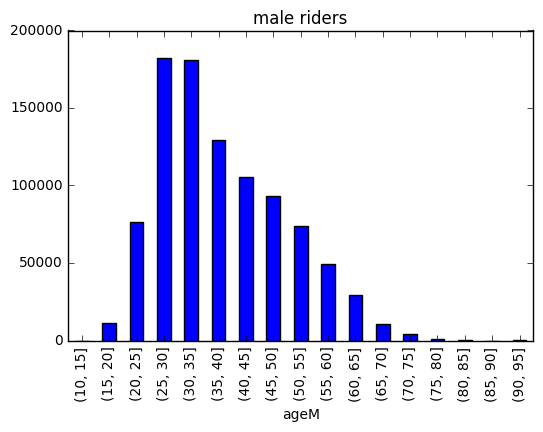

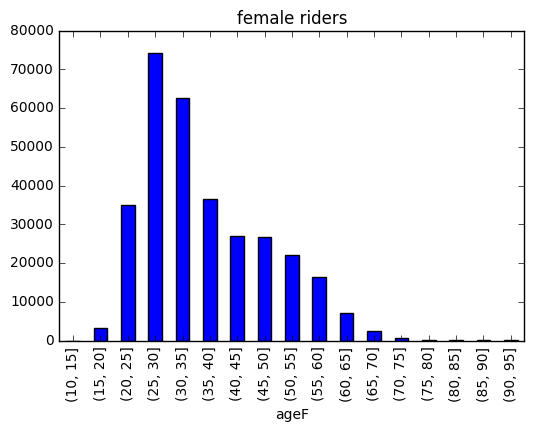

In [9]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")

### Figure 1: histogrammed distribution of riders' ages by gender

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.001804
(20, 25]       0.028723
(25, 30]       0.072360
(30, 35]       0.080015
(35, 40]       0.059895
(40, 45]       0.034306
(45, 50]       0.021237
(50, 55]       0.013730
(55, 60]       0.013854
(60, 65]       0.005400
(65, 70]       0.002165
(70, 75]       0.000173
(75, 80]       0.000019
(80, 85]       0.000061
(85, 90]       0.000010
(90, 95]       0.000000


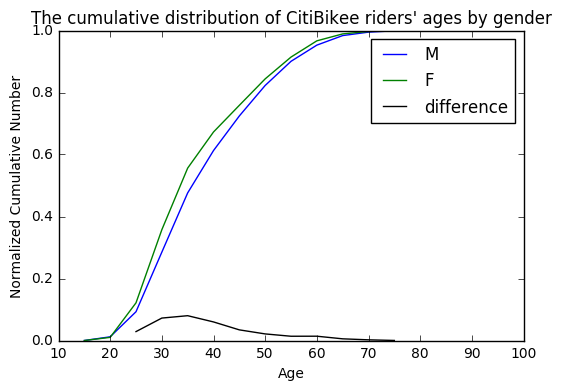

In [10]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.title("The cumulative distribution of CitiBikee riders' ages by gender")
pl.legend()

# Tests
set significance level: alpha=0.05

In [11]:
import scipy.stats

# KS tests to compart 2 samples

In [25]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.10835640729442816, pvalue=0.0)


The scipy KS test returns a KS statistics as well as a p-value. If the p-value is high or the K-S statistics is small, then our null hypothesis that the distributions of two samples are the same can not be rejected.
In this case, the p value is 0.0, therefore we reject the null hypothesis. 

## Redo the test with a subsample of the data: take only 1 ride every of 200

In [13]:
#First calculate the number of observations for each gender
print(len(df.ageM))
print(len(df.ageF))

947425
314575


In [39]:
starter=6
subM=[]
subF=[]
Mlist=df['ageM'].values.tolist()
Flist=df['ageF'].values.tolist()
for i in range(int(len(df.ageM)/200)):
    subM.append(Mlist[starter+200*i])
for i in range(int(len(df.ageF)/200)):
    subF.append(Flist[starter+200*i])

In [42]:
ks2=scipy.stats.ks_2samp(subM,subF)
print(ks2)

Ks_2sampResult(statistic=0.10303409733670771, pvalue=2.1840096794887769e-11)


The scipy KS test returns a KS statistics as well as a p-value. Our null hypothesis is the distributions of two samples are the same.  The p-value in this case is small and less than 0.05, thus we could reject our null hypothesis. 

# Pearson's test for correlation

In [20]:
#Since there is an imbalance in the number, do a random without replacement sampling. 
nesM=np.random.choice(df.ageM,20000,False)
nesF=np.random.choice(df.ageF,20000,False)
#sorting 
soM=sorted(nesM)
soF=sorted(nesF)

In [21]:
scipy.stats.pearsonr(soM,soF)

(0.99623531725337078, 0.0)

Pearson's test returned a Pearson correlation coefficient and a p-value.

The p value, which means the probability of an uncorrelated system producing datasets 
that have a Pearson correlation at least at extreme as the one computed from these datasets is 0.0. Therefore we could reject the null hypothesis, which the datasets are uncorrelated. 


# Spearman's test for correlation

In [25]:
scipy.stats.spearmanr(soM,soF)

SpearmanrResult(correlation=0.99908040390360731, pvalue=0.0)

Spearman's test returned a Spearman correlation coeffeicent and a p value.
The Null hypothesis here is two sets of data are uncorrelated.

The p value, which means the probability of an uncorrelated system producing datasets that have a Spearman correlation at least at extreme as the one computed from these datasets is 0.0. Therefore we could reject the null hypothesis, which the datasets are uncorrelated.